# About 
This notebook explores the NFL weather dataset that was downloaded from www.nflsavant.com.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [3]:
DATAFILE = 'nfl-weather.csv'

In [4]:
data = pd.read_csv(DATAFILE)

In [5]:
data.columns

Index([u'id', u'home_team', u'home_score', u'away_team', u'away_score',
       u'temperature', u'wind_chill', u'humidity', u'wind_mph', u'weather',
       u'date'],
      dtype='object')

In [6]:
def add_dates(data):

    dates = {}
    dates['year']  = []
    dates['month'] = []
    dates['day']   = []

    for row in data.itertuples():

        # the date is the last thing in a row 
        date_string = row[-1].split('/')
    
        dates['month'].append(int(date_string[0]))
        dates['day'].append(int(date_string[1]))
        dates['year'].append(int(date_string[2]))
    
    dates_df = pd.DataFrame(dates)
    data = pd.concat([data, dates_df], axis=1)
    return data

In [7]:
data.head(12)

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960
5,196009250phi,Philadelphia Eagles,24,Cleveland Browns,41,61,NaN,77%,9.0,61 degrees- relative humidity 77%- wind 9 mph,9/25/1960
6,196009300dal,Dallas Cowboys,25,Philadelphia Eagles,27,77,NaN,50%,11.0,77 degrees- relative humidity 50%- wind 11 mph,9/30/1960
7,196010020gnb,Green Bay Packers,28,Detroit Lions,9,53,NaN,78%,16.0,53 degrees- relative humidity 78%- wind 16 mph,10/2/1960
8,196010020cle,Cleveland Browns,28,Pittsburgh Steelers,20,54,NaN,78%,15.0,54 degrees- relative humidity 78%- wind 15 mph,10/2/1960
9,196010020clt,Baltimore Colts,42,Chicago Bears,7,54,NaN,76%,9.0,54 degrees- relative humidity 76%- wind 9 mph,10/2/1960


In [8]:
data = add_dates(data)
data.columns

Index([u'id', u'home_team', u'home_score', u'away_team', u'away_score',
       u'temperature', u'wind_chill', u'humidity', u'wind_mph', u'weather',
       u'date', u'day', u'month', u'year'],
      dtype='object')

In [32]:
def plot_one_histogram(data, teams, axis, bins):
    
    n_col = 5
    n_row = 1 + len(teams)/n_col
    plt.figure(figsize=(4*n_col, 4*n_row))

    for index, team in enumerate(teams):
        team_data = data[data.home_team == team]
    
        plt.subplot(n_row, n_col, index+1)
        plt.hist(team_data[axis], bins=bins, histtype='stepfilled', 
                edgecolor='red', color='yellow', hatch='///');
        plt.title(team)
        plt.xlabel(axis)
    
    plt.tight_layout()
    
def plot_time_average(data, teams, axis):
    
    years = np.arange(np.min(data.year), np.max(data.year))
    average = {}
    std = {}
    
    plt.figure(figsize=(8,5))
    
    for team in teams:
        average[team] = []
        std[team] = []
        team_data = data[data.home_team == team]

        for year in years:
            data_sub = team_data.query('year == %d' % year)
            
            if len(data_sub) is 0:
                average[team].append(0)
                std[team].append(0)
            else:
                average[team].append(np.average(data_sub[axis]))
                std[team].append(np.std(data_sub[axis]))
    

        plt.errorbar(x=years, y=average[team], yerr=std[team], 
                     linestyle='', marker='o')

In [23]:
all_teams = np.unique(data.home_team)

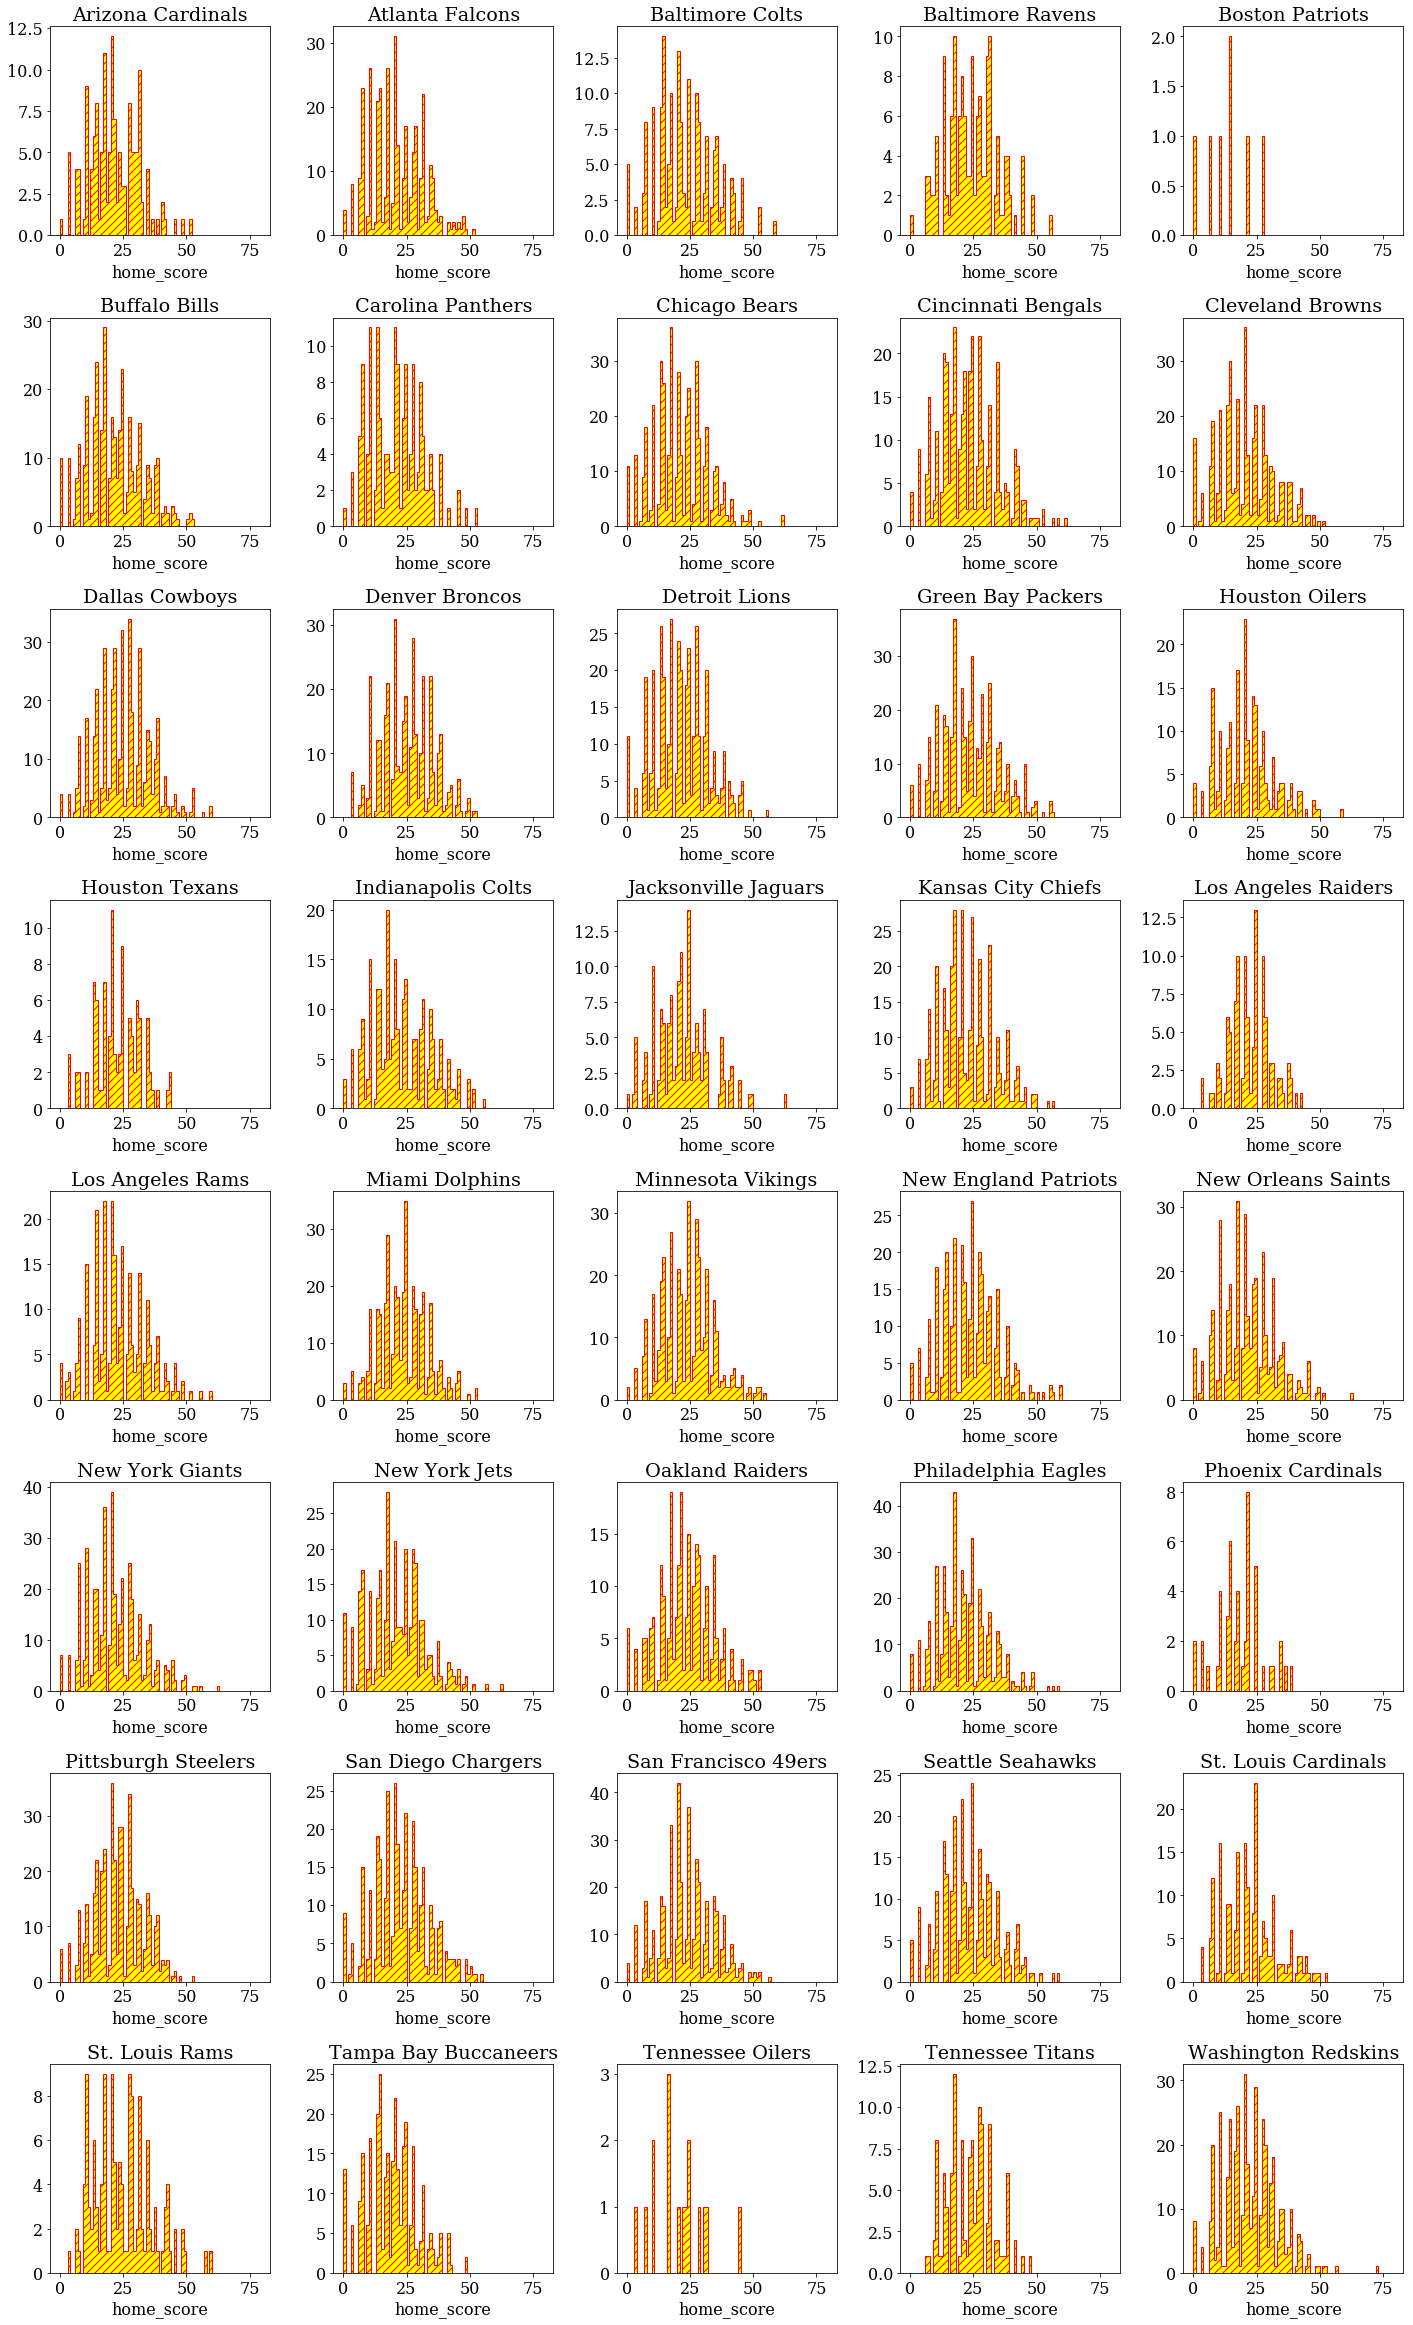

In [24]:
plot_one_histogram(data, all_teams, 'home_score', np.linspace(0, 79, 80))

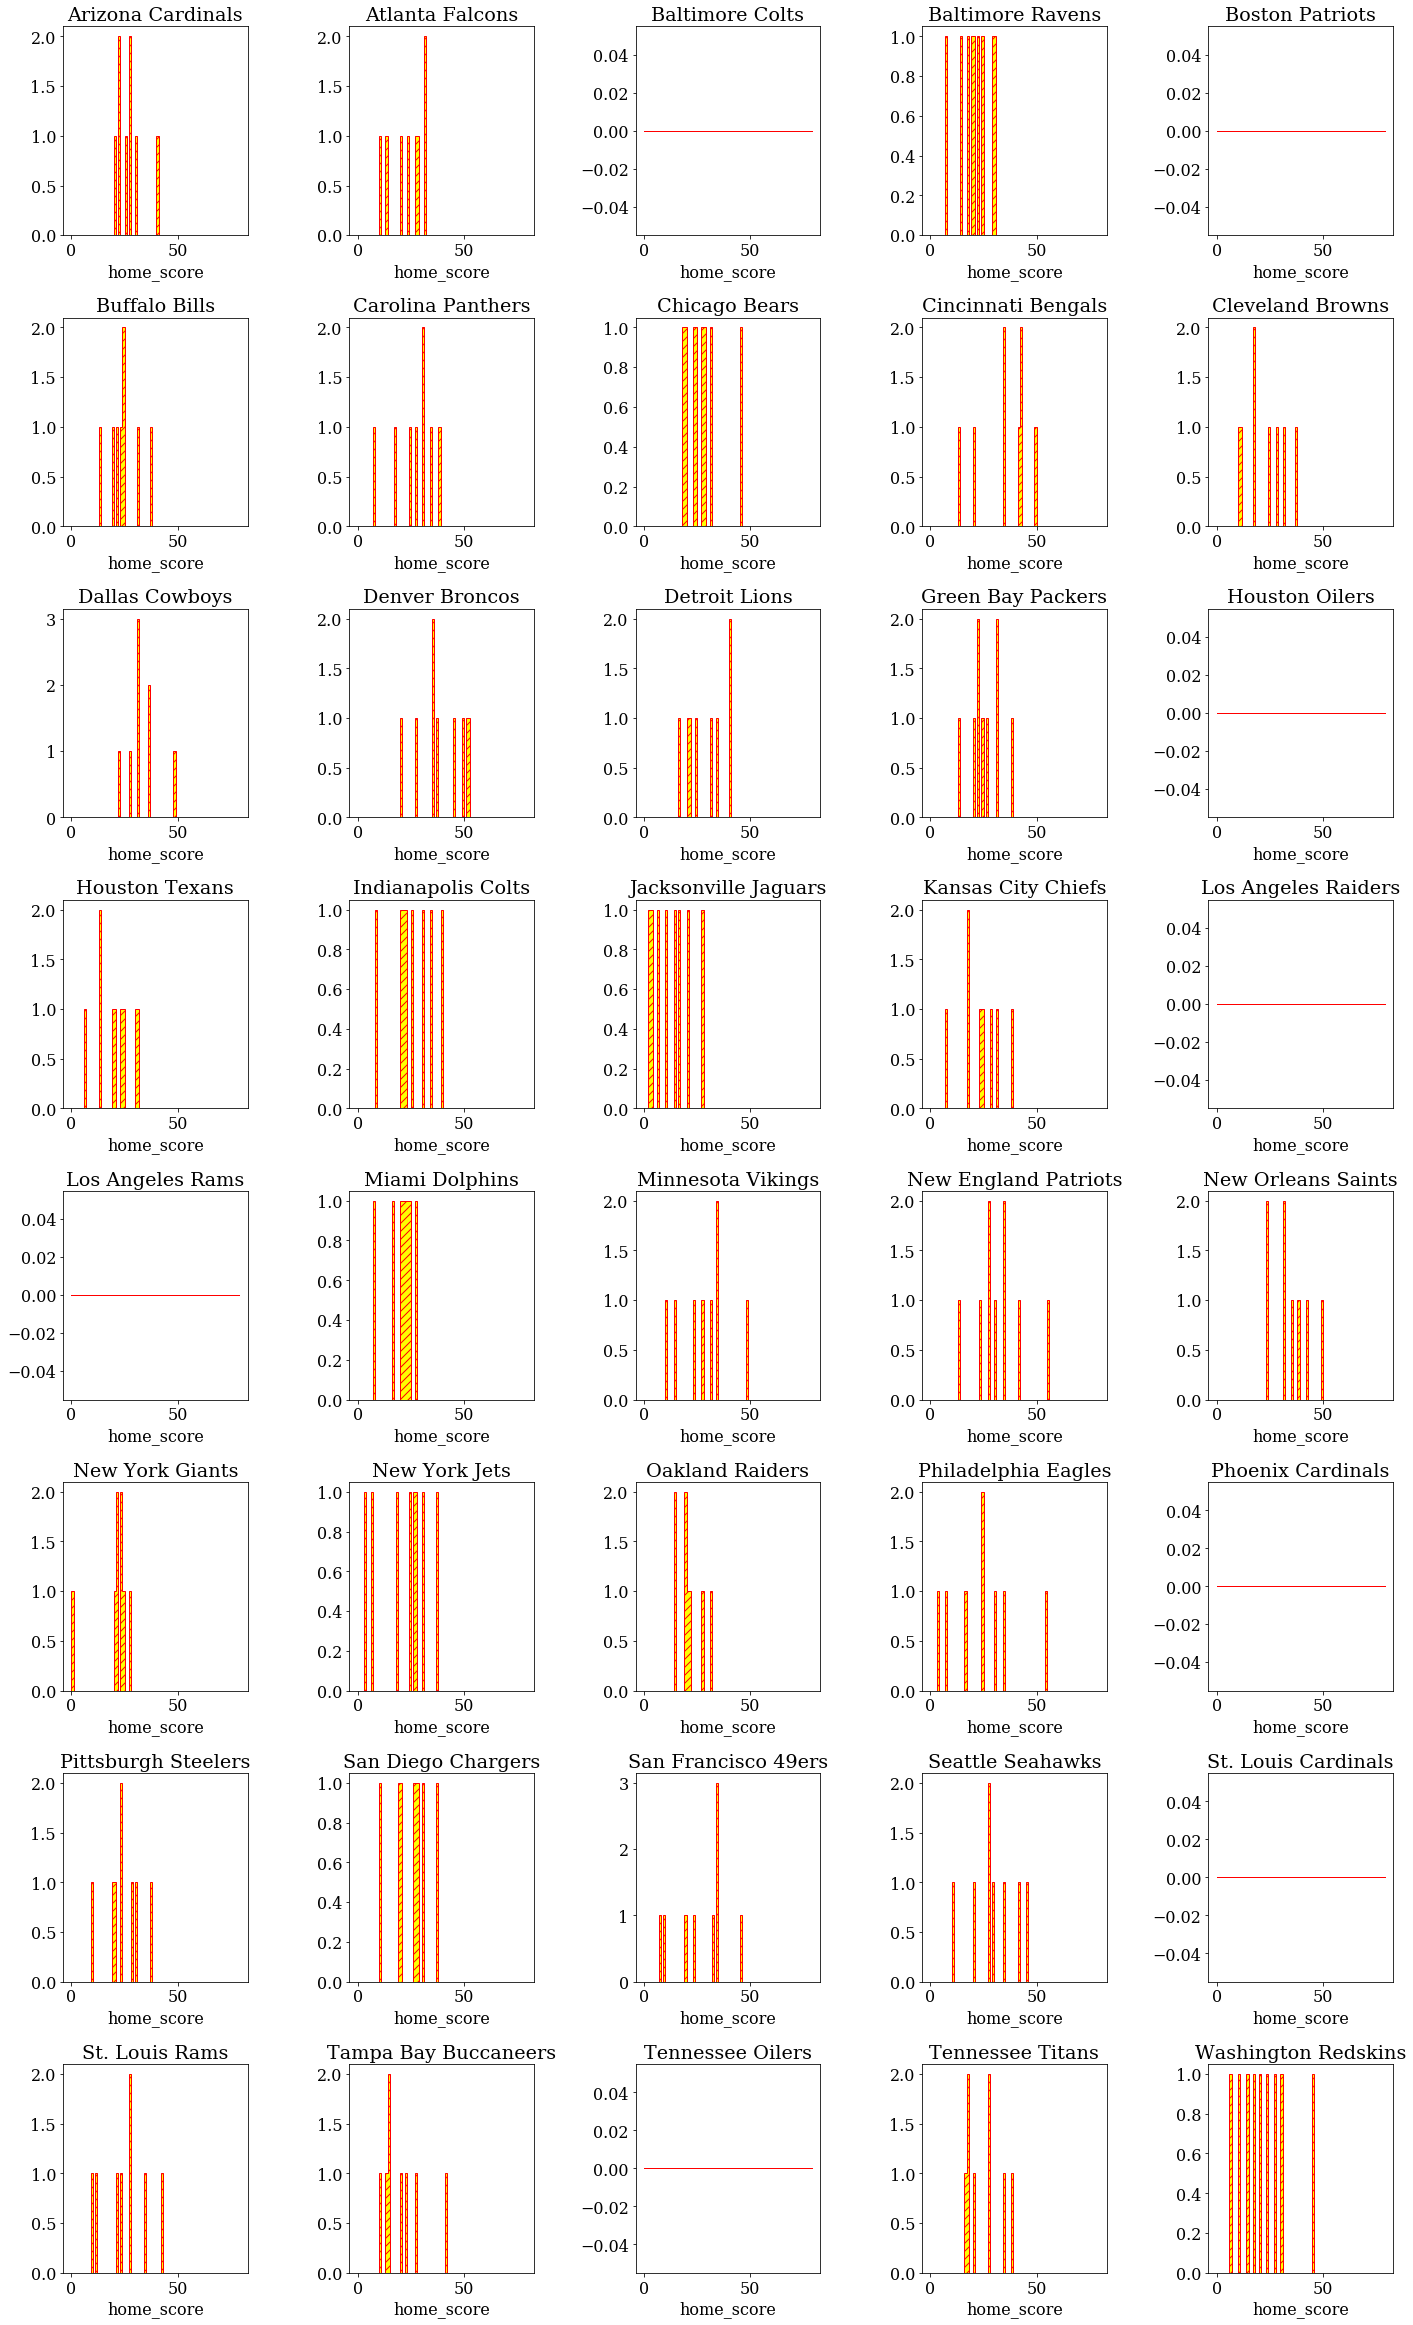

In [25]:
plot_one_histogram(data.query('year == 2013'), all_teams, 'home_score', np.linspace(0, 79, 80))

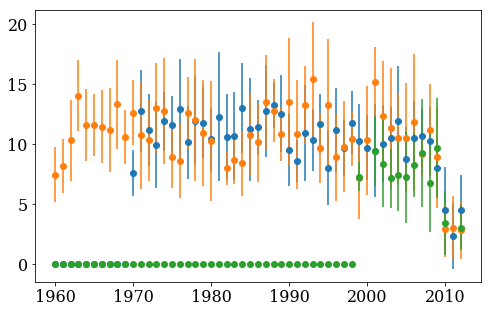

In [39]:
plot_time_average(data, list(['Miami Dolphins', 'Philadelphia Eagles', 'Tennessee Titans']), 'wind_mph')

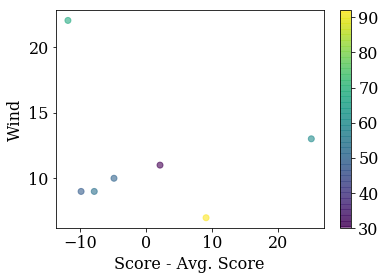

In [82]:
for team in list(['Philadelphia Eagles']):
#for team in all_teams:
    team_data = data[data.away_team == team]
    year_data = team_data.query('year == 1992')
    #year_data = team_data
    
    plt.scatter(year_data.away_score-np.average(year_data.away_score), 
                year_data.wind_mph, 
                c=year_data.temperature,
                alpha=0.6)
    
    plt.xlabel('Score - Avg. Score')
    plt.ylabel('Wind')
    plt.colorbar()